**Klasifikasi Gambar Buah Apel dan Pisang dengan ANN** -
Nurkholis Setiawan (2102020032)

In [1]:
import random
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.utils import normalize
from keras.initializers import Constant

In [2]:
logging.basicConfig(level=logging.DEBUG,
                    format='%(asctime)s %(message)s',
                    handlers=[logging.FileHandler("ga+adam.log"),
                              logging.StreamHandler()
                              ])

In [3]:
class ANN(Sequential):

  def __init__(self, child_weights=None):
    super().__init__()

    if child_weights is None:
      layer1 = Dense(32, activation='relu')
      layer2 = Dense(32, activation='relu')
      layer3 = Dense(1, activation='sigmoid')
      self.add(Flatten(input_shape=(224, 224, 3)))
      self.add(layer1)
      self.add(layer2)
      self.add(layer3)
    else:
      self.add(Flatten(input_shape=(224, 224, 3))),
      self.add(
          Dense(32, activation='relu',
               kernel_initializer=Constant(child_weights[0]),
               bias_initializer='ones')
      )
      self.add(
          Dense(32, activation='relu',
               kernel_initializer=Constant(child_weights[1]),
               bias_initializer='zeros')
      )
      self.add(
          Dense(1, activation='sigmoid',
               kernel_initializer=Constant(child_weights[2]),
               bias_initializer='ones')
      )

  def forward_propagation(self, train_feature, train_label):
    predict_label = self.predict(train_feature)
    self.fitness = accuracy_score(train_label, predict_label.round())

  def compile_train(self, epochs):
    self.compile(
        optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    self.fit(train_feature, train_label, validation_data=(test_feature, test_label), epochs=epochs)

In [4]:
def crossover(nn1, nn2):
    nn1_weights = []
    nn2_weights = []
    child_weights = []

    for i,layer in enumerate(nn1.layers):
      if i > 0:
        weights = layer.get_weights()
        nn1_weights.append(weights[0])

    for i,layer in enumerate(nn2.layers):
       if i > 0:
        weights = layer.get_weights()
        nn2_weights.append(weights[0])


    for i in range(len(nn1_weights)):
      split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
      for j in range(split, np.shape(nn1_weights[i])[1]-1):
        nn1_weights[i][:, j] = nn2_weights[i][:, j]

      child_weights.append(nn1_weights[i])

    mutation(child_weights)
    child = ANN(child_weights)
    return child

In [5]:
def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0,1)
    if mut <= .04:
      child_weights[selection] *= random.randint(2, 5)
    else:
      pass

In [6]:
df = pd.read_csv('Data/images.csv')

In [7]:
dataset = df.values
df_images = dataset[:,:-1]
labels = dataset[:,-1]
df_images = np.array([np.reshape(arr, (224, 224, 3)) for arr in df_images])
train_feature = normalize(df_images[:70])
train_label = labels[:70]

test_origin = df_images[70:]
test_feature = normalize(df_images[70:])
test_label = labels[70:]
class_names = ['Apel', 'Pisang']

In [8]:
networks = []
pool = []
generation = 0
population = 20
for i in range(population):
  networks.append(ANN())

max_fitness = 0

optimal_weights = []

epochs = 100

In [9]:
for i in range(epochs):
  generation+=1
  logging.debug("Generation: "+ str(generation) + "\r\n")
  for ann in networks:
    ann.forward_propagation(train_feature, train_label)
    pool.append(ann)

  networks.clear()

  pool = sorted(pool, key=lambda x: x.fitness)
  pool.reverse()

  for i in range(len(pool)):
    if pool[i].fitness > max_fitness:
      max_fitness = pool[i].fitness
      logging.debug("Max fitness: " + str(max_fitness) + "\r\n")

      optimal_weights = []
      for i,layer in enumerate(pool[i].layers):
         if i > 0:
            weights = layer.get_weights()
            optimal_weights.append(weights[0])
      logging.debug("Optimal weights: " + str(optimal_weights) + "\r\n")
  for i in range(5):
    for j in range(2):
      temp = crossover(pool[i], random.choice(pool))
      networks.append(temp)
  pool.clear()

2023-07-04 20:22:14,612 Generation: 1



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:16,204 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001DFAB4649A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:16,396 5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001DFAB4674C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:19,025 Max fitness: 0.6571428571428571

2023-07-04 20:22:19,052 Optimal weights: [array([[ 0.00060176,  0.00059808, -0.00109486, ..., -0.00150488,
        -0.00170542,  0.00335799],
       [ 0.00160063, -0.00288612,  0.00171405, ..., -0.00442083,
         0.00423448, -0.00155748],
       [-0.002504  , -0.00613504,  0.0014756 , ..., -0.00238776,
        -0.00132648, -0.00402048],
       ...,
       [ 0.00071539, -0.00382236,  0.00437591, ..., -0.00604038,
        -0.00240424, -0.00051919],
       [-0.00211368, -0.00068263, -0.00415834, ..., -0.00518003,
        -0.00108967,  0.00191354],
       [ 0.00204851,  0.0011178 ,  0.00204622, ...,  0.00305864,
        -0.00397788, -0.00058426]], dtype=float32), array([[-0.23041165, -0.12398483,  0.10133979, ...,  0.11627635,
         0.08403838, -0.17101495],
       [ 0.21444717,  0.03954947, -0.05642506, ..., -0.23920944,
        -0.10652399,  0.13869005],
       [ 0.1962826 ,  0.26978746,  0.07677323, ...,  0.13226748,
       

3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:22,848 Generation: 3



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:25,756 Generation: 4



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:22:29,159 Generation: 5



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:31,183 Max fitness: 0.7

2023-07-04 20:22:31,195 Optimal weights: [array([[-2.9253382e-03,  1.5336811e-03, -2.5493484e-03, ...,
        -4.6615028e-03,  5.7976791e-03,  6.2908563e-03],
       [-2.5560821e-03, -4.9222196e-03,  5.5639804e-03, ...,
         1.3173465e-03, -2.4000532e-03,  2.5964514e-03],
       [ 1.8473365e-03, -4.1163778e-03,  2.1399199e-03, ...,
        -5.8007557e-03, -7.7628065e-04, -4.1985074e-03],
       ...,
       [ 1.0792632e-03,  4.6038390e-03,  2.3694988e-04, ...,
         1.2093536e-03,  9.7028725e-04,  8.3797378e-04],
       [-1.4979625e-03, -4.6386649e-03, -5.4875701e-03, ...,
        -3.7695386e-03, -8.3088037e-04, -8.6026266e-05],
       [-5.8511836e-03,  5.7593086e-03, -1.4615743e-03, ...,
         3.8122432e-04,  7.8474497e-04, -4.2877635e-03]], dtype=float32), array([[ 0.14069784, -0.12382825, -0.03628761, ...,  0.14812973,
         0.29051003,  0.2607517 ],
       [-0.10061197, -0.10493864,  0.00859815, ...,  0.2038103 ,
        -0.176

3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:35,235 Generation: 7



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:22:38,853 Generation: 8



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:22:41,686 Generation: 9



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:22:44,808 Generation: 10



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:48,144 Generation: 11



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:50,915 Generation: 12



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:22:53,791 Generation: 13



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:22:56,568 Generation: 14



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:22:58,492 Max fitness: 0.7285714285714285

2023-07-04 20:22:58,504 Optimal weights: [array([[-0.00292534, -0.00450998,  0.00611551, ..., -0.04661503,
        -0.01705422,  0.03145428],
       [-0.00255608, -0.00181171, -0.00415967, ...,  0.01317346,
         0.04234483,  0.01298226],
       [ 0.00184734, -0.00390904,  0.00427375, ..., -0.05800756,
        -0.01326482, -0.02099254],
       ...,
       [ 0.00107926, -0.00115206,  0.00380027, ...,  0.01209354,
        -0.02404242,  0.00418987],
       [-0.00149796,  0.00421933,  0.00497503, ..., -0.03769539,
        -0.01089669, -0.00043013],
       [-0.00585118, -0.00268591, -0.00047852, ...,  0.00381224,
        -0.03977884, -0.02143882]], dtype=float32), array([[-0.19528148, -0.03785002,  0.08422461, ...,  0.11627635,
         0.08403838,  0.2607517 ],
       [ 0.20639369, -0.16237155,  0.05546111, ..., -0.23920944,
        -0.10652399,  0.22226319],
       [ 0.16404656,  0.16505745,  0.00849134, ...,  0.13226748,
       

3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:02,493 Generation: 16



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:05,558 Generation: 17



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:09,196 Generation: 18



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:23:12,011 Generation: 19



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:14,807 Generation: 20



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:17,578 Generation: 21



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:20,369 Generation: 22



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:23,209 Generation: 23



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:26,305 Generation: 24



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:29,171 Generation: 25



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:32,291 Generation: 26



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:35,205 Generation: 27



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:23:38,590 Generation: 28



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:41,496 Generation: 29



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:23:44,386 Generation: 30



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:47,160 Generation: 31



3/3 [==============================] - 0s 10ms/step


2023-07-04 20:23:50,040 Generation: 32



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:23:52,889 Generation: 33



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:23:55,796 Generation: 34



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:23:58,601 Generation: 35



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:01,433 Generation: 36



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:05,078 Generation: 37



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:07,881 Generation: 38



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:10,642 Generation: 39



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:24:13,449 Generation: 40



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:16,239 Generation: 41



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:18,943 Generation: 42



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:21,844 Generation: 43



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:24,783 Generation: 44



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:27,483 Generation: 45



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:30,435 Generation: 46



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:24:33,946 Generation: 47



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:36,914 Generation: 48



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:39,664 Generation: 49



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:42,641 Generation: 50



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:45,505 Generation: 51



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:24:48,308 Generation: 52



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:51,056 Generation: 53



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:54,219 Generation: 54



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:24:57,173 Generation: 55



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:00,066 Generation: 56



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:03,334 Generation: 57



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:06,502 Generation: 58



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:09,659 Generation: 59



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:12,764 Generation: 60



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:15,743 Generation: 61



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:18,635 Generation: 62



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:21,498 Generation: 63



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:24,580 Generation: 64



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:25:27,421 Generation: 65



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:30,865 Generation: 66



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:33,697 Generation: 67



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:36,659 Generation: 68



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:39,458 Generation: 69



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:42,314 Generation: 70



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:45,241 Generation: 71



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:25:47,980 Generation: 72



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:50,857 Generation: 73



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:25:53,723 Generation: 74



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:25:56,589 Generation: 75



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:00,195 Generation: 76



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:03,178 Generation: 77



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:06,065 Generation: 78



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:08,858 Generation: 79



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:11,852 Generation: 80



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:26:14,810 Generation: 81



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:17,620 Generation: 82



3/3 [==============================] - 0s 11ms/step


2023-07-04 20:26:20,592 Generation: 83



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:26:23,587 Generation: 84



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:26,585 Generation: 85



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:30,295 Generation: 86



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:33,304 Generation: 87



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:26:36,274 Generation: 88



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:26:39,257 Generation: 89



3/3 [==============================] - 0s 9ms/step


2023-07-04 20:26:42,116 Generation: 90



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:26:45,101 Generation: 91



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:47,995 Generation: 92



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:50,927 Generation: 93



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:53,999 Generation: 94



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:26:57,521 Generation: 95



3/3 [==============================] - 0s 6ms/step


2023-07-04 20:27:00,636 Generation: 96



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:27:03,696 Generation: 97



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:27:06,544 Generation: 98



3/3 [==============================] - 0s 7ms/step


2023-07-04 20:27:09,807 Generation: 99



3/3 [==============================] - 0s 8ms/step


2023-07-04 20:27:12,900 Generation: 100



3/3 [==============================] - 0s 8ms/step


In [10]:
print(f'max fitness: {max_fitness}')

max fitness: 0.7285714285714285


In [11]:
ann = ANN(optimal_weights)
ann.compile_train(epochs*5)
predict_label = ann.predict(test_feature)
print('Test Accuracy: %.2f' % accuracy_score(test_label, predict_label.round()))

Epoch 1/500
3/3 [==============================] - 1s 180ms/step - loss: 7.4310 - accuracy: 0.5714 - val_loss: 34.1693 - val_accuracy: 0.3000
Epoch 2/500
3/3 [==============================] - 0s 61ms/step - loss: 13.2144 - accuracy: 0.5571 - val_loss: 4.9097 - val_accuracy: 0.7000
Epoch 3/500
3/3 [==============================] - 0s 61ms/step - loss: 2.9785 - accuracy: 0.6714 - val_loss: 10.4794 - val_accuracy: 0.3000
Epoch 4/500
3/3 [==============================] - 0s 62ms/step - loss: 3.4965 - accuracy: 0.5857 - val_loss: 4.6347 - val_accuracy: 0.7000
Epoch 5/500
3/3 [==============================] - 0s 104ms/step - loss: 4.0773 - accuracy: 0.5714 - val_loss: 1.2307 - val_accuracy: 0.8000
Epoch 6/500
3/3 [==============================] - 0s 64ms/step - loss: 1.1815 - accuracy: 0.8000 - val_loss: 1.9959 - val_accuracy: 0.6000
Epoch 7/500
3/3 [==============================] - 0s 63ms/step - loss: 0.5856 - accuracy: 0.9000 - val_loss: 2.3675 - val_accuracy: 0.8000
Epoch 8/500
3/3

In [12]:
print(classification_report(test_label, predict_label.round()))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [13]:
specificity = recall_score(test_label, predict_label.round())
precision = precision_score(test_label, predict_label.round())
accuracy = accuracy_score(test_label, predict_label.round())

print(f'Nilai Spesificity/Recall: {specificity}')
print(f'Nilai Precision: {precision}')
print(f'Nilai Accuracy: {accuracy}')

Nilai Spesificity/Recall: 0.8571428571428571
Nilai Precision: 0.8571428571428571
Nilai Accuracy: 0.8


In [16]:
def display_images_predicted(images, predicted):
    num_images = len(images)
    num_rows = (num_images + 4) // 5  # Calculate the number of rows
    fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(12, 3 * num_rows))

    for i, (image, prediction) in enumerate(zip(images, predicted)):
        row = i // 5  # Calculate the row number
        col = i % 5   # Calculate the column number
        image_predicted = int(np.round(prediction))
        label = class_names[image_predicted]
        axes[row, col].imshow(image)
        axes[row, col].set_title(f'{label} ({prediction[0]:.2f})', fontsize=12)
        # axes[row, col].axis('off')

    # Remove unused subplots
    for j in range(num_images, num_rows * 5):
        axes.flatten()[j].axis('off')

    plt.tight_layout()
    plt.show()

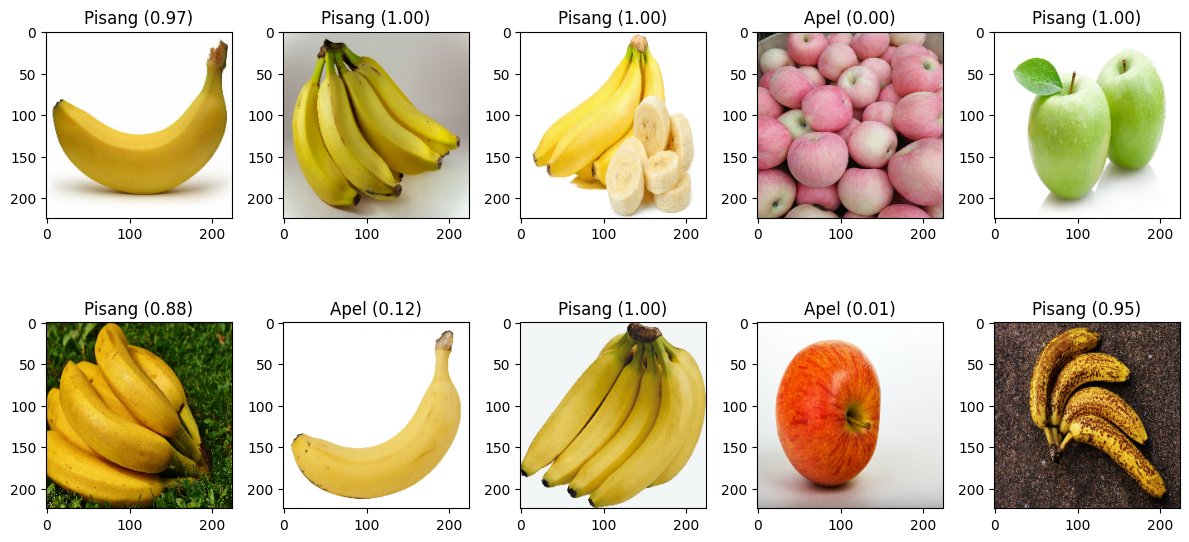

In [17]:
display_images_predicted(test_origin, predict_label)